In [1]:
import numpy as np
import tensorflow as tf
import cv2

F:\Softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape = (150, 150, 3), 
                                                                   include_top = False, weights = 'imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Last layer output shape:  (None, 7, 7, 768)


In [6]:
X = tf.keras.layers.Flatten()(last_output)
X = tf.keras.layers.Dense(1024, activation = 'relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(1, activation = 'sigmoid')(X)
model = tf.keras.models.Model(pre_trained_model.input, X)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', 
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
data_path = r'C:\Users\user\Desktop\Data Science\datasets\covid_train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                               rotation_range = 40,
                                                               width_shift_range = 0.2,
                                                               height_shift_range = 0.2,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True,
                                                               fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(data_path, target_size = (150,150), batch_size = 8, class_mode = 'binary')

Found 112 images belonging to 2 classes.


In [9]:
t_path = r'C:\Users\user\Desktop\Data Science\datasets\covid_test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(t_path, target_size = (150,150), batch_size = 4, class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')>0.95):
            print("95% Accuracy Achieved!")
            self.model.stop_training = True
callback = myCallback()

In [11]:
history = model.fit(train_generator, steps_per_epoch = 14, epochs = 50, validation_data = test_generator, 
                    validation_steps = 5, callbacks = [callback])

Epoch 1/50
14/14 [==============================] - 53s 4s/step - loss: 1.9954 - acc: 0.4821 - val_loss: 0.6036 - val_acc: 0.9000
Epoch 2/50
14/14 [==============================] - 16s 1s/step - loss: 1.2062 - acc: 0.6429 - val_loss: 1.1843 - val_acc: 0.8500
Epoch 3/50
14/14 [==============================] - 15s 1s/step - loss: 0.8307 - acc: 0.7500 - val_loss: 0.4018 - val_acc: 0.9000
Epoch 4/50
14/14 [==============================] - 15s 1s/step - loss: 0.3598 - acc: 0.8482 - val_loss: 0.3633 - val_acc: 0.8500
Epoch 5/50
14/14 [==============================] - 15s 1s/step - loss: 0.2741 - acc: 0.8571 - val_loss: 0.2390 - val_acc: 0.9000
Epoch 6/50
14/14 [==============================] - 16s 1s/step - loss: 0.2498 - acc: 0.8839 - val_loss: 0.1946 - val_acc: 0.9000
Epoch 7/50
14/14 [==============================] - 15s 1s/step - loss: 0.4651 - acc: 0.8482 - val_loss: 0.2329 - val_acc: 0.9000
Epoch 8/50
14/14 [==============================] - 15s 1s/step - loss: 0.4565 - acc: 0.83

<IPython.core.display.Javascript object>


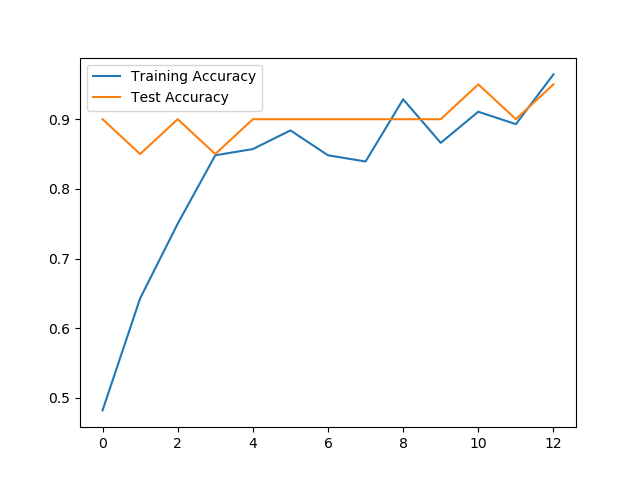

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.figure()
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Test Accuracy")
plt.legend()

In [ ]:
face_clsfr = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source = cv2.VideoCapture(0)

source.set(1,320)
source.set(2,480)

labels_dict = {0:'MASK',1:'NO MASK'}
color_dict = {0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img = source.read()
    faces = face_clsfr.detectMultiScale(img,1.4,5)  

    for (x,y,w,h) in faces:
    
        face_img = img[y:y+w,x:x+w]
        
        resized = cv2.resize(face_img,(150,150))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1,150,150,3))
        result = model.predict(reshaped)

        p = result[0][0]
        if p>=0.5:
            label = 1
        else:
            label = 0
        print(label)
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
        
    cv2.imshow('LIVE',img)
    key = cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()